#### Scribers
    Theriot Ryan
    Liu Leon
    Muroaka Blair
    Vaagen Kjetil

In [1]:
# %load ../standard_import.txt
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import linregress


%matplotlib inline


### Non Linear Regression

* True underlying models are rarely linear
    * Linear models underfit and cannot always adequately capture the underlying structure of the data
* Linearity assumption is often "good enough", particularly in:
  * Tackling questions are just not well defined to benefit from more complex models
    * Occam's razor: "simpler solutions are more likely to be correct than complex ones."
    * Always in search of better models but how much leverage but always evaluate how much more leverage a precise model going to provide
    * If a more precise model is only marginally more accurate, then it may not be worth creating
  * Quick prototype simple models that require full interpretability
    * Simpler models can be used to generate more complex ones
    
<img src="images/fitting.png" alt="fitting" style="width:700px;"/>

### TellTale or non-linearity - 1

* The model clearly looks non-linear (parabolic)

$$
y = 30 -0.5 x +0.005 x^2 + \epsilon
$$

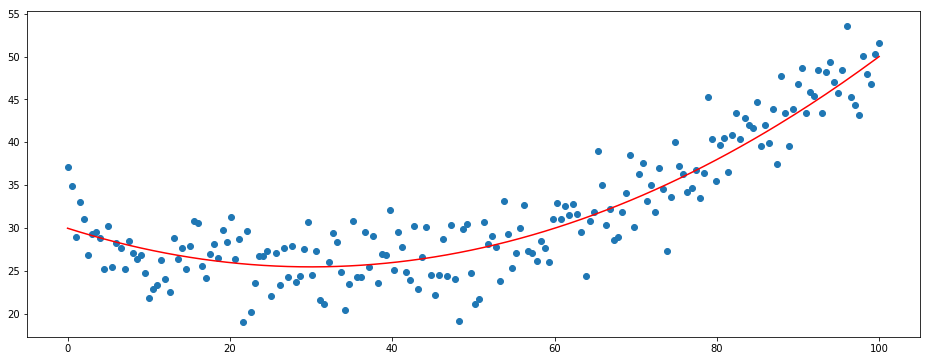

In [2]:
plt.figure(figsize=(16,6))

x = np.linspace(0,100, 200)
errors = np.random.normal(0,3, size=200)
y = 30 + (-0.3 * x)+ (0.005*x**2) +  errors
x2 = np.linspace(0,100, 200)
y2 = 30 + (-0.3 * x)+ (0.005*x**2)
plt.scatter(x,y)
plt.plot(x2,y2, color='r')

### TellTale or non-linearity - 2

* Erors terms are not iid (independent and identically distributed)
  * Recall that the the assumption is that $\epsilon \sim \mathcal{N}(\mu,\sigma)$
      * Or the error is appromixately a Gaussian distribution with mean $\mu$ and deviation $\sigma$
  * this is a violation of the assumption
      * non iid error terms mean they are not normally distributed

Text(0.5, 1.0, 'Residuals plot')

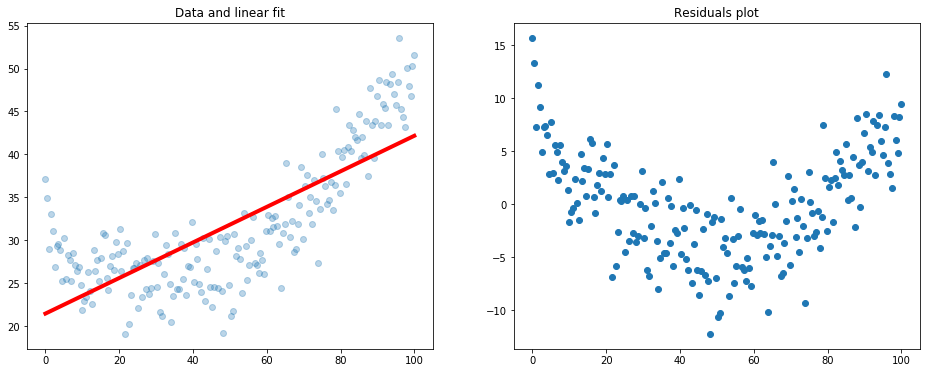

In [3]:
lm = linregress(x, y)

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.scatter(x, y, alpha=0.3)
plt.plot(x, lm.intercept + lm.slope * x, color='r', linewidth=4)
plt.title("Data and linear fit")



RSS_vals = []
for (x_i, y_i) in zip(x,y):
    y_hat = lm.intercept + lm.slope * x_i 
    RSS_vals.append(y_i - y_hat)

plt.subplot(1,2,2)
  
plt.scatter(x, RSS_vals)
plt.title("Residuals plot")


As seen in the example above, the linear fit is not the best model to describe the data or its residual. Instead the original polynomial function $y = 30 -0.5 x +0.005 x^2$ is

### Non-Linear Models

* How do we handle the case data is clearly non-linear?

* A naive approach is perhaps to compute the model as the average of some points above and below that point 
*  for example, for $x=40$, we need to take 3 observed data points immediately before and after
  * say for instance we take 5 points
 
* This is  called a nearest Neighbor regression

### Nearest Neighbor Regression

* Based on the k-nearest neighbors algorithm, it is a type of instance-based learning, or lazy learning, where the function is only approximated locally (among its neighbors) and all computation is deferred until regression
* Neighbors are taken from a set of objects for which the object property value is known
* The output is the property value for the object. This value is the average of the values of the nearest neighbors.
* It is sensitive to the local structure of the data, such as outliers

In [4]:
np.searchsorted(x, 70), 

(140,)

In [5]:
x[np.searchsorted(x, 70)]

70.35175879396985

In [6]:
pos = np.searchsorted(x, 70)
x[pos: pos+5]

array([70.35175879, 70.85427136, 71.35678392, 71.85929648, 72.36180905])

In [7]:
pos = np.searchsorted(x, 70)
x[pos-5: pos]

array([67.83919598, 68.34170854, 68.84422111, 69.34673367, 69.84924623])

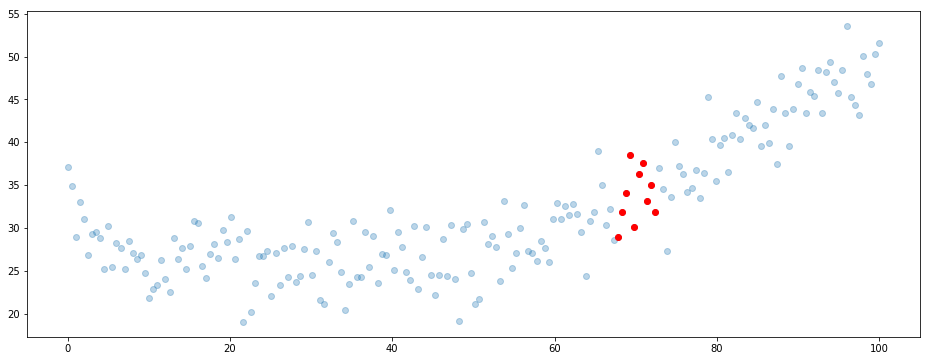

In [8]:
plt.figure(figsize=(16,6))

neighbors = np.arange(pos-5, pos+5)
plt.scatter(x, y, alpha=0.3)
plt.scatter(x[neighbors], y[neighbors], color="red")


As seen from the example above, points 5 left and 5 right the point x = 70 inclusive ([65, 80]) are calculated

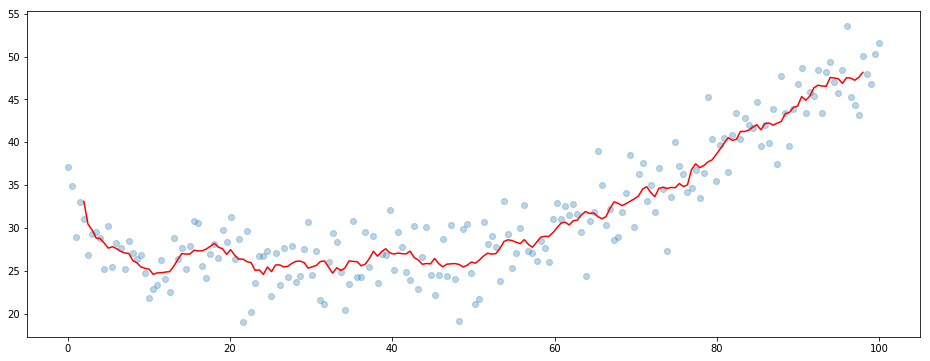

In [9]:
plt.figure(figsize=(16,6))

reg_line = []
for i in x[4:-4]:
    pos = pos = np.searchsorted(x, i)
    neighbors = np.arange(pos-5, pos+5)
    reg_line.append(y[neighbors].mean())

plt.scatter(x, y, alpha=0.3)
plt.plot(x[4:-4], reg_line, color="red")

Now in this example above, for each point in x, an average is computed using values 5 points left and right of it. These averages are used for the regression.

### Problems with this approach

What are the issues with this approach?



### Problems with Nearest Neighbor Regression

With larger data, we can expect it to be slower. With more complexity (more parameters, more dimensions), it will not scale too well. If there are extremities in our data, our visualization may end up askewed, and that data missing. Remember how outliers like spikes and dips disproportionately affect data smoothening.

In some cases, it may be wise to use what is called a step function to measure in smaller chunks rather than the whole data.


### Step Functions

Divide the x range into different chunks of a certain interval n, and have a constant to represent each interval.
  * Such a group-specific constant can be `mean` as in nearest neighbors
 
This amounts to converting a continuous variable into an ordered categorical variable.
We can use split to get an array of arrays of n size to get our intervals.

From there we can use this range to calculate our constant (the mean in this case) from our original data based on the indices in the intervals.

In [10]:
intervals = np.split(np.arange(len(x)), 10)
intervals

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39]),
 array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
        57, 58, 59]),
 array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76,
        77, 78, 79]),
 array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
        97, 98, 99]),
 array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119]),
 array([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139]),
 array([140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159]),
 array([160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 175, 176, 177, 178, 179]),
 array([180, 181, 182, 183, 184, 185, 

In [11]:
intervals[4]

array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
       97, 98, 99])

In [12]:
x[intervals[4]]

array([40.20100503, 40.70351759, 41.20603015, 41.70854271, 42.21105528,
       42.71356784, 43.2160804 , 43.71859296, 44.22110553, 44.72361809,
       45.22613065, 45.72864322, 46.23115578, 46.73366834, 47.2361809 ,
       47.73869347, 48.24120603, 48.74371859, 49.24623116, 49.74874372])

In [13]:
y[intervals[4]].mean()

26.23161302889949

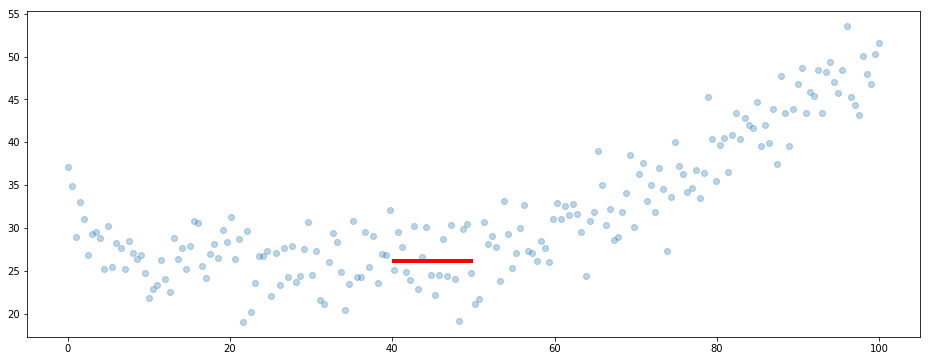

In [14]:
plt.figure(figsize=(16,6))

plt.scatter(x, y, alpha=0.3)
plt.plot(x[intervals[4]], [y[intervals[4]].mean()] * len(intervals[4]), color="red", linewidth=4)


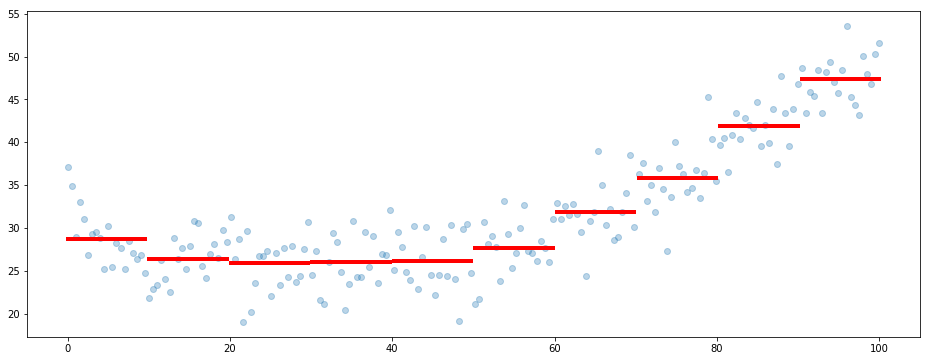

In [15]:
plt.figure(figsize=(16,6))
plt.scatter(x, y, alpha=0.3)
means = []
for i in range(len(intervals)):
    means.append(y[intervals[i]].mean())
    plt.plot(x[intervals[i]], [y[intervals[i]].mean()] * len(intervals[i]), color="red", linewidth=4)



### Shortcoming of Step Function

* How do you interpret sudden changes between two points close on the x-axis?

As you can see with this kind of approach, there is a constant value, meaning we cannot properly capture what happens at two adjacent points. With that, choosing an n value can be troublesome to calculate.
  

### Polynomial Regression

Rather than model the data with a 1st-degree polynomial (linear), we will instead use degrees of higher value. This will give us a curve that would more fit the data based on certain fluctuations in data

* A 1st degree polynomial
$$
    y = \beta_0 + \beta_1 x
$$



* 3rd degree polynomial 
$$ 
    y = \beta_0 ~~+~~ \beta_1 x ~~+~~ \beta_2x^2 ~~+~~ \beta_3x^3 
$$

In [16]:
# we take a small subsample of x, 
# results are more dramatic
np.random.seed(46)
subset_indices = np.random.choice(np.arange(len(x)), size=20)
subset_indices.sort()
subset_indices


array([ 22,  30,  31,  32,  40,  55,  59,  60,  69,  72,  79,  93,  98,
       116, 130, 146, 147, 155, 186, 189])

In [17]:
x.reshape(-1,1)

array([[  0.        ],
       [  0.50251256],
       [  1.00502513],
       [  1.50753769],
       [  2.01005025],
       [  2.51256281],
       [  3.01507538],
       [  3.51758794],
       [  4.0201005 ],
       [  4.52261307],
       [  5.02512563],
       [  5.52763819],
       [  6.03015075],
       [  6.53266332],
       [  7.03517588],
       [  7.53768844],
       [  8.04020101],
       [  8.54271357],
       [  9.04522613],
       [  9.54773869],
       [ 10.05025126],
       [ 10.55276382],
       [ 11.05527638],
       [ 11.55778894],
       [ 12.06030151],
       [ 12.56281407],
       [ 13.06532663],
       [ 13.5678392 ],
       [ 14.07035176],
       [ 14.57286432],
       [ 15.07537688],
       [ 15.57788945],
       [ 16.08040201],
       [ 16.58291457],
       [ 17.08542714],
       [ 17.5879397 ],
       [ 18.09045226],
       [ 18.59296482],
       [ 19.09547739],
       [ 19.59798995],
       [ 20.10050251],
       [ 20.60301508],
       [ 21.10552764],
       [ 21

## Using Linear Model in sklearn

1. Two step process
    * Transform x into PolynomialFeatures

2. Fit the model using the transformed polynomial features.


From the implementation point of view, this is just plain Ordinary Least Squares (scipy.linalg.lstsq) wrapped as a predictor object


Transform: 
$$ 
    y = \beta_0 ~~+~~ \beta_1 x ~~+~~ \beta_2x^2 ~~+~~ \beta_3x^3 
$$
into:   
$$ 
    y = \beta_0 * 1 ~~+~~ \beta_1 \cdot A ~~+~~ \beta_2 \cdot B ~~+~~ \beta_3 \cdot C\mbox{, where  }A=x\mbox{, }B=x^2\mbox{ and }C=x^3
$$


## Using Linear Model in sklearn - Cont'd

Transform: 
$$ 
    y = \beta_0 ~~+~~ \beta_1 x ~~+~~ \beta_2x^2 ~~+~~ \beta_3x^3 
$$
into:   
$$ 
    y = \beta_0 ~~+~~ \beta_1 \cdot A ~~+~~ \beta_2 \cdot B ~~+~~ \beta_3 \cdot C\mbox{, where  }A=x\mbox{, }B=x^2\mbox{ and }C=x^3
$$


* This can be easily done using `PolynomialFeatures`

Basically, here we are swapping out every power of x into a variable that would hold multiples of that nth power value.
When we specify a degree, we are specifying for each x val to give the 0th power to the nth value of that power and store it into an array (3rd degree would mean we would have an array for each x value containing the 0th, 1st, 2nd, and 3rd power).

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

v = np.array([1,2,3,4,5])
poly.fit_transform(v.reshape(-1,1))

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

## Using Linear Model in sklearn - Cont'd

* For $v=[1, 2, 3, 4, 5]$, $x_0 = 1$

In polynomial regression (3rd degree polynomia) with what we had done just earlier:

$$
v_0{'} = (v_0^0 = 1,~~A=v_0^1,~~B=v_0^2,~~C =v_0^3) 
$$
Therefore
$$
\begin{split}
V{'} =& [[  1.,   1.,   1.,   1.],\\
     &  [  1.,   2.,   4.,   8.], \\
     &  [  1.,   3.,   9.,  27.], \\
     &  [  1.,   4.,  16.,  64.], \\
     &  [  1.,   5.,  25., 125.]]
\end{split}
$$



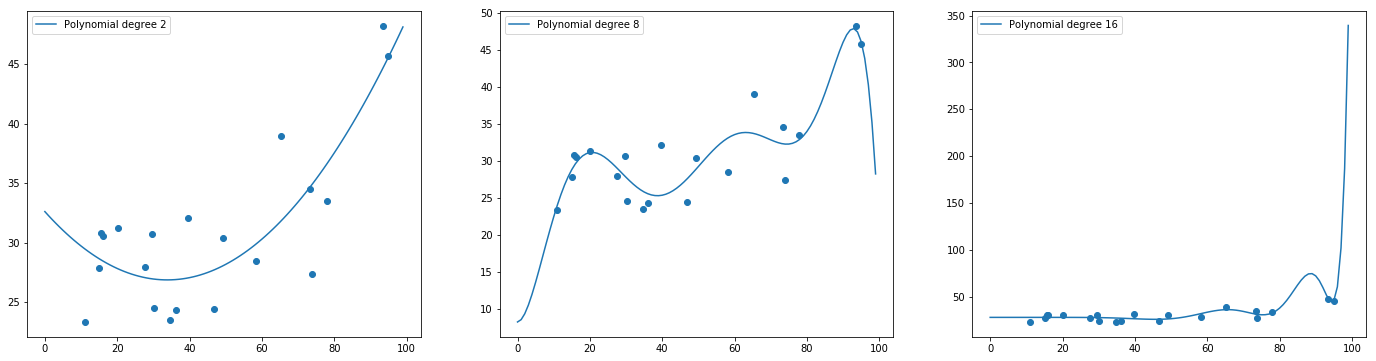

In [19]:

from sklearn import linear_model

# np.random
plt.figure(figsize=(24,6))


x_axis= np.arange(0,max(x)).reshape(-1,1)

for i, polDegree in enumerate([2, 8, 16]):
    plt.subplot(1,3,i+1)

    plt.scatter(x[subset_indices], y[subset_indices])
    poly = PolynomialFeatures(degree=polDegree)
    X_vals_transformed = poly.fit_transform(x[subset_indices].reshape(-1,1))    
    X_axis_transformed = poly.transform(x_axis)

    lin = linear_model.LinearRegression()
    lin.fit(X_vals_transformed, y[subset_indices].reshape(-1,1))
    y_hat =  lin.predict(X_axis_transformed)

    plt.plot(x_axis, y_hat, label= "Polynomial degree %s" % polDegree)
    plt.legend() 

### Shortcoming of Higher Order Polynomials

For a dataset of n complexity, an nth degree polynomial will fit perfectly 
* The curve will have n-1 turning points.
* If the is data quadratic in reality, we will have a lot of oscillations towards the ends

As you can see, different degrees can depict lines that seemingly match the shape of the curve. However, as the degree gets higher, the line appears to be more linear and thus difficult to tell whats going on there (fig. 3). Therefore, we can conclude that oscillations alone will not be enough to see the characteristics of our data. 

### Piecewise Polynomials
* Regression splines is one of the most important non-linear regression techniques.
    * Previously we used one high degree polynomial function which has some drawbacks described above.
    * This imposed one global structure on the dataset.
    * To overcome this, we can divide the distribution of data into separate portions (knots/bins) and try to fit a linear or low degree polynomial to each of these knots.
    * Functions we use to model knots are called Piecewise functions, and there exists many different functions. 
    * To avoid sharp edges between polynomial, like those generated step function, by improsing conuity
      * i.e., differentiable
* Constraints and spines
    * Using more knots leads to a more flexible piecewise polynomial.
    * One useful constraint is that both ends of a knot should be continous. 


In [20]:
# two nots (20 and 50)
# three regions (< 20, >20 <50,>55)
x_1_idx = np.where(x<20)
x_2_idx = np.where((x>=30) & (x<55))
x_3_idx = np.where(x>=55)
print("first region: ", x_1_idx)
print("second region: ", x_2_idx)
print("thirs region: ", x_3_idx)

first region:  (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]),)
second region:  (array([ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]),)
thirs region:  (array([110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 19

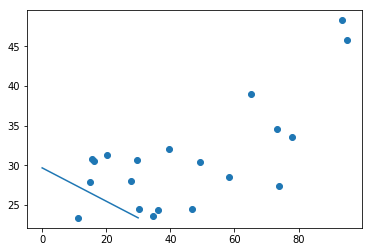

In [21]:
plt.scatter(x[subset_indices], y[subset_indices])

x_1_axis = np.arange(0, 30, 0.05).reshape(-1,1)

poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x[x_1_idx].reshape(-1,1))    
X_axis_transformed = poly.transform(x_1_axis)

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y[x_1_idx].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_1_axis, y_hat, label= "Polynomial degree %s" % polDegree)




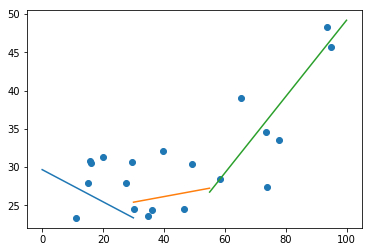

In [22]:
plt.scatter(x[subset_indices], y[subset_indices])

x_1_axis = np.arange(0, 30, 0.05).reshape(-1,1)

poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x[x_1_idx].reshape(-1,1))    
X_axis_transformed = poly.transform(x_1_axis)

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y[x_1_idx].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_1_axis, y_hat, label= "Polynomial degree %s" % polDegree)



x_2_axis = np.arange(30, 55, 0.05).reshape(-1,1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x[x_2_idx].reshape(-1,1))    
X_axis_transformed = poly.transform(x_2_axis)

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y[x_2_idx].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_2_axis, y_hat, label= "Polynomial degree %s" % polDegree)


x_3_axis = np.arange(55, 100, 0.05).reshape(-1,1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x[x_3_idx].reshape(-1,1))    
X_axis_transformed = poly.transform(x_3_axis)

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y[x_3_idx].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_3_axis, y_hat, label= "Polynomial degree %s" % polDegree)



### What do we Want to do? 

* We want to create a smooth function
  * for the first knot, occurring at  x_i,  we want f_0(x_i)= f_1(x_i)
    * Curve is continuous at the knot
  * Similarly for the remaining knots
      * Previous  and next approximations are equal at the knot
* This is called the matching condition
* We want first derivative to be equal at each point

<img src="images/continuous_first_derivative.png" alt="continuous_first_derivative.png" style="width:700px;"/>


In [23]:
x[subset_indices]

array([11.05527638, 15.07537688, 15.57788945, 16.08040201, 20.10050251,
       27.63819095, 29.64824121, 30.15075377, 34.67336683, 36.18090452,
       39.69849246, 46.73366834, 49.24623116, 58.29145729, 65.32663317,
       73.36683417, 73.86934673, 77.88944724, 93.46733668, 94.97487437])

In [24]:
x_1_subset = x[subset_indices[0:8]]
x_2_subset = x[subset_indices[7:12]]
x_3_subset = x[subset_indices[11:14]]
x_4_subset = x[subset_indices[13:]]

y_1_subset = y[subset_indices[0:8]]
y_2_subset = y[subset_indices[7:12]]
y_3_subset = y[subset_indices[11:14]]
y_4_subset = y[subset_indices[13:]]


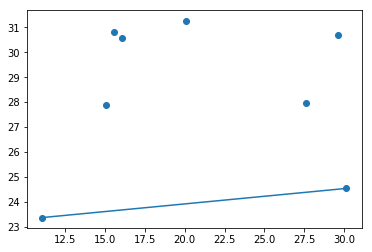

In [25]:
plt.scatter(x_1_subset, y_1_subset)


x_1_axis = np.arange(min(x_1_subset), max(x_1_subset), 0.05).reshape(-1,1)

poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x_1_subset[[0,-1]].reshape(-1,1))    
X_axis_transformed = poly.transform(x_1_axis)

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y_1_subset[[0,-1]].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_1_axis, y_hat, label= "Polynomial degree %s" % polDegree)





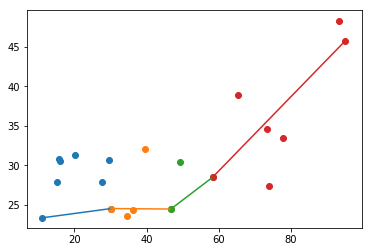

In [26]:
plt.scatter(x_1_subset, y_1_subset)
x_1_axis = np.arange(min(x_1_subset), max(x_1_subset), 0.05).reshape(-1,1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x_1_subset[[0,-1]].reshape(-1,1))    
X_axis_transformed = poly.transform(x_1_axis)
lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y_1_subset[[0,-1]].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_1_axis, y_hat, label= "Polynomial degree %s" % polDegree)



plt.scatter(x_2_subset, y_2_subset)
x_2_axis = np.arange(min(x_2_subset), max(x_2_subset), 0.05).reshape(-1,1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x_2_subset[[0,-1]].reshape(-1,1))    
X_axis_transformed = poly.transform(x_2_axis)
lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y_2_subset[[0,-1]].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_2_axis, y_hat, label= "Polynomial degree %s" % polDegree)


plt.scatter(x_3_subset, y_3_subset)
x_3_axis = np.arange(min(x_3_subset), max(x_3_subset), 0.05).reshape(-1,1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x_3_subset[[0,-1]].reshape(-1,1))    
X_axis_transformed = poly.transform(x_3_axis)
lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y_3_subset[[0,-1]].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_3_axis, y_hat, label= "Polynomial degree %s" % polDegree)


plt.scatter(x_4_subset, y_4_subset)
x_4_axis = np.arange(min(x_4_subset), max(x_4_subset), 0.05).reshape(-1,1)
poly = PolynomialFeatures(degree=1)
X_vals_transformed = poly.fit_transform(x_4_subset[[0,-1]].reshape(-1,1))    
X_axis_transformed = poly.transform(x_4_axis)
lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y_4_subset[[0,-1]].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)
plt.plot(x_4_axis, y_hat, label= "Polynomial degree %s" % polDegree)

### What do we Want to do? - Cont'd

* In a addition to the above we want curves to be smooth at knots
* We want second derivative to be equal at each point
  * Guarantees that transitions between the curve are smooth


<img src="images/continuous_second_derivative.png" alt="continuous_second_derivative.png" style="width:700px;"/>


In [27]:
# we take a small subsample of x, 
# results are more dramatic


from patsy import dmatrix
import statsmodels.api as sm
# Specifying 3 knots
transformed_x = dmatrix("bs(x, knots=(25,40,60), degree=1, include_intercept=False)",
                        {"x": x[subset_indices]}, return_type='dataframe')
model_4 = sm.GLM(y[subset_indices], transformed_x).fit()

pred4 = model_4.predict(dmatrix("bs(x_axis, knots=(25,40,60), degree=1, include_intercept=False)",
                              {"x_axis": x_axis}, return_type='dataframe'))
model_4.params


Intercept                                                          27.560507
bs(x, knots=(25, 40, 60), degree=1, include_intercept=False)[0]     1.659397
bs(x, knots=(25, 40, 60), degree=1, include_intercept=False)[1]    -1.149947
bs(x, knots=(25, 40, 60), degree=1, include_intercept=False)[2]     1.274796
bs(x, knots=(25, 40, 60), degree=1, include_intercept=False)[3]    17.657996
dtype: float64

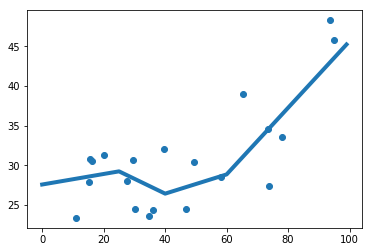

In [28]:
plt.scatter(x[subset_indices], y[subset_indices])
plt.plot(x_axis, pred4, linewidth=4)

### Cubic Splines
* Cubic spline is a piecewise polynomial with a set of extra constraints
    * Continuity 
    * Continuity of the first derivative 
    * Continuity of the second derivative
* Using line does not provide for "local" flexibility at the knots
* S line has only two degrees of freedom, $(a,b)$ in $y =a + bx$
  * Forcing the line to go through two points, we have used both degrees of freedom
* A quadratic has three degrees of freedom $(a,b,c)$ in $y =a + b x +c x^2$
  * Forcing a quadratic to go through two points and fixing the derivative at one of the knots we have used all three degrees of freedom
    * No way to fix the derivative at the second knot.
* A cubic spline has four degrees of freedom $(a,b,c,d)$ in $y =a + b x +c x^2 + x^3$
  * Forcing a quadratic to go through two points and fixing the derivative at one of the knots we have used all three degrees of freedom



### Cubic Splines - Cont'd


* A cubic spline with knots at $\xi_k$, $k = 1, . . . , K$ is a piecewise cubic polynomial with continuous derivatives up to order 2 at each knot



In [29]:
# we take a small subsample of x, 
# results are more dramatic


from patsy import dmatrix
import statsmodels.api as sm
# Specifying 3 knots
x_axis = np.arange(min(x[subset_indices]), max(x[subset_indices]), 0.05).reshape(-1,1)
transformed_x = dmatrix("bs(x, degree=3, df=4, include_intercept=False)",
                        {"x": x[subset_indices]}, return_type='dataframe')
model_4 = sm.GLM(y[subset_indices], transformed_x).fit()

pred4 = model_4.predict(dmatrix("bs(x_axis,df=4, degree=3, include_intercept=False)",
                              {"x_axis": x_axis}, return_type='dataframe'))
model_4.params


Intercept                                            26.495129
bs(x, degree=3, df=4, include_intercept=False)[0]     4.597818
bs(x, degree=3, df=4, include_intercept=False)[1]    -4.103370
bs(x, degree=3, df=4, include_intercept=False)[2]     6.013743
bs(x, degree=3, df=4, include_intercept=False)[3]    20.246765
dtype: float64

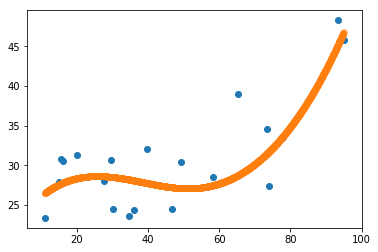

In [30]:
plt.scatter(x[subset_indices], y[subset_indices])
plt.scatter(x_axis, pred4, alpha=0.4)

### How Many Knots to Use? 


* Simple (naive approach) is to try out different numbers of knots and see which produces the best looking curve
* A more objective approach is to use cross-validation
 1. Remove a portion of the data (ex.: 10 %)
 2. Fit a spline with a certain number of knots to the remaining data (90% remaining)
 3. Use the spline to make predictions for the held-out portion
 4. Repeat this process multiple times until each observation has been left out once
 5. Compute the overall cross-validated RSS
   * total RSS across all split for a given number of knots 
 6. Repeat for different numbers of knots K and pick K with the smallest RSS
 
 The code below shows this process using polynomial regression. We remove a certain percentage of the data (10%), this will be our TEST data. The remaining 90% of the data is used to form a polynomial regression line. We iterate a specified number of polynomial values, 8 in our case, and fit a regression line to the 90% data each time. We then predict from this regression line and calculate  the difference from the TEST data removed prior. We select the line with lowest RSS value.

The best value for the number of knots:  2


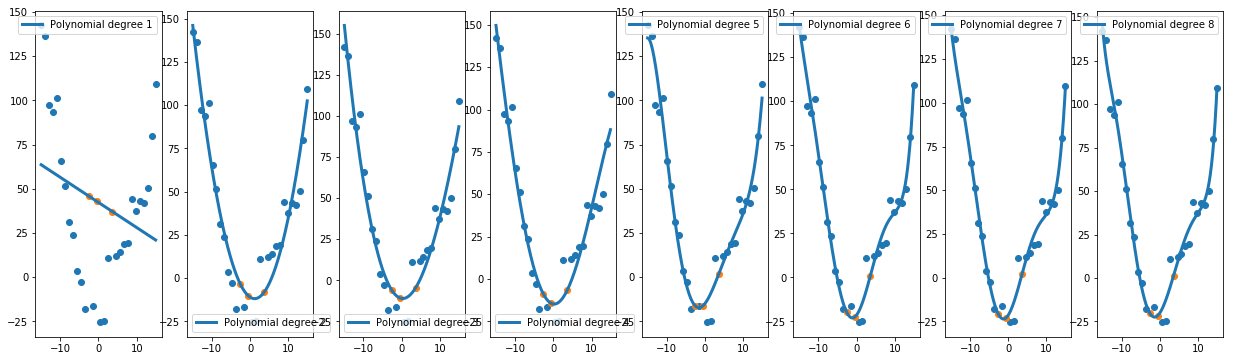

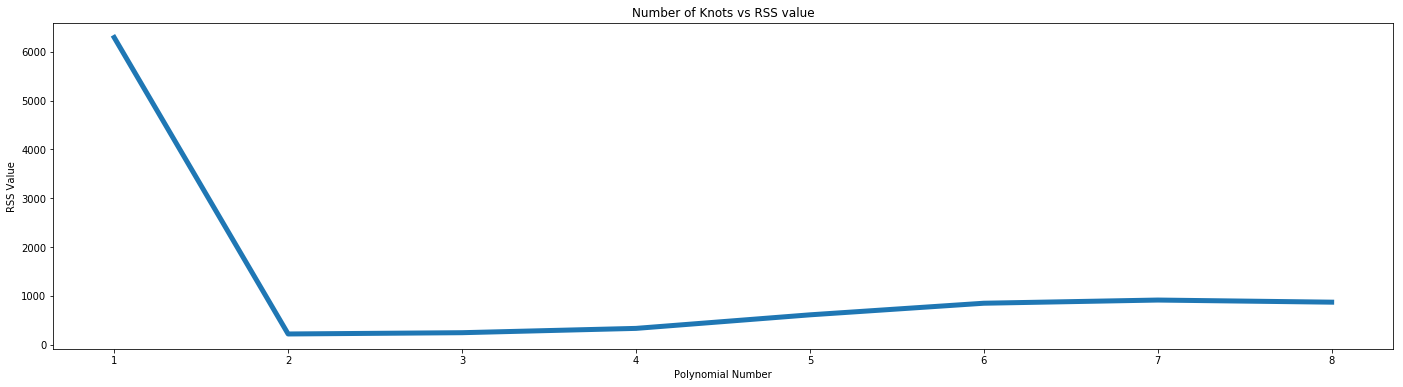

In [31]:
from patsy import dmatrix
import statsmodels.api as sm

# Create Data
size = 30
x_vals = np.linspace(-15,15, size)
error_vals = np.random.normal(-10,10,size=size)
y_vals = 5 + (-x_vals) + (0.5*x_vals**2) + (-0.002*x_vals**3) + (0.0004*x_vals**4) +  error_vals

# Remove a portion of the data
size_remove =  int(size * 0.10)
test_idx = np.random.choice(np.arange(len(x_vals)), size=size_remove)
test_idx.sort()
train_idx = list(range(size))
for index in sorted(test_idx, reverse=True):
    del train_idx[index]

# Fit data for a different amount of knots and calculate RSS
RSS_vals = []
num_k = 9
plt.figure(figsize=(24,6))
for i in range(1, num_k):
    x_axis = np.arange(min(x_vals[train_idx]), max(x_vals[train_idx]), 0.05).reshape(-1,1)
    
    poly = PolynomialFeatures(degree=i)
    
    X_vals_transformed = poly.fit_transform(x_vals[train_idx].reshape(-1,1))    
    X_axis_transformed = poly.transform(x_axis)
    X_test_transformed = poly.transform(x_vals[test_idx].reshape(-1,1))
    
    lin = linear_model.LinearRegression()
    lin.fit(X_vals_transformed, y_vals[train_idx].reshape(-1,1))
    spline =  lin.predict(X_axis_transformed)
    predict = lin.predict(X_test_transformed)
    
    prediction = predict.reshape(1,-1)[0]
    rss = ((prediction - y_vals[test_idx]) ** 2).sum()
    RSS_vals.append(rss)
    
    plt.subplot(1,num_k,i)
    plt.scatter(x_vals[train_idx], y_vals[train_idx])
    plt.scatter(x_vals[test_idx], prediction)
    plt.plot(x_axis, spline, label= "Polynomial degree %s" % i, linewidth=3)
    plt.legend() 
    

print("The best value for the number of knots: ", RSS_vals.index(min(RSS_vals)) + 1)
plt.figure(figsize=(24,6))
plt.title("Number of Knots vs RSS value")
plt.xlabel("Polynomial Number")
plt.ylabel("RSS Value")
plt.plot(np.arange(1, num_k), RSS_vals, linewidth=5)


### Where do you Choose the Knots

* Ideally, you want to put more knots in regions where the data vary most rapidly

* In practice, it's common to place knots uniformly
  * For example at equally distant quantiles of the data
  * Ex. put 3 knots at the 25th, 50th and 75th quantiles of the data
  
 Another option is to use a histogram to help locate where the majority of the data is located. 
 
 As shown below, the histogram shows the majority of the data is around 0, -2, 2.
 
 Selecting (-6, 0, 6) for the knots, shown in red, the line doesn't fit the data very well.
 
 But selecting (-2, 0, 2) for the knots, shown in green, the line fits the data better.


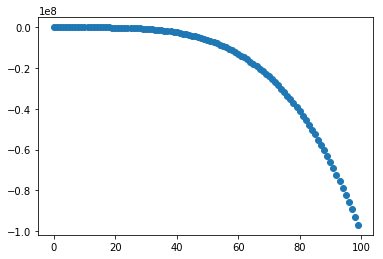

In [33]:
# we take a small subsample of x, 
# results are more dramatic


x_test = np.arange(0,100)
y_test = 2+ (1.01 ** x_test) - (1.02 * x_test**2) + ( 1.01 * x_test**3) - ( 1.02 * x_test**4)
plt.scatter(x_test, y_test)

# from patsy import dmatrix
# import statsmodels.api as sm
# size = 100
# np.random.seed(2)
# x_k = np.random.normal(0,3, size)
# error_k = np.random.normal(0, 0.2, size)
# y_k = np.sin(x_k) + 0.2 * x_k + np.cos(abs(x_k)) + error_k

# plt.figure(figsize=(24,6))
# plt.hist(x_k)
# x_axis_k = np.arange(min(x_k), max(x_k), 0.05).reshape(-1,1)

# transformed_k1 = dmatrix("bs(x, knots=(-6,0,6), degree=3, include_intercept=False)",
#                         {"x": x_k}, return_type='dataframe')
# model_k1 = sm.GLM(y_k, transformed_k).fit()

# pred_k1 = model_k.predict(dmatrix("bs(x_axis, knots=(-6,0,6), degree=3, include_intercept=False)",
#                               {"x_axis": x_axis_k}, return_type='dataframe'))

# transformed_k2 = dmatrix("bs(x, knots=(-2,0,2), degree=3, include_intercept=False)",
#                         {"x": x_k}, return_type='dataframe')
# model_k2 = sm.GLM(y_k, transformed_k).fit()

# pred_k2 = model_k.predict(dmatrix("bs(x_axis, knots=(-2,0,2), degree=3, include_intercept=False)",
#                               {"x_axis": x_axis_k}, return_type='dataframe'))



# plt.figure(figsize=(24,6))
# plt.scatter(x_k, y_k)
# plt.plot(x_axis_k, pred_k1, linewidth=4, color="red", label="Knots = -6, 0, 6")
# plt.plot(x_axis_k, pred_k2, linewidth=4, color="green", label="Knots = -2, 0, 2")
# plt.legend() 

### Splines Versus Linear Regression

* Regression splines typically give superior results to polynomial regression
  * Do not need to use high degree polynomials to fit the data
    * We can fit a very complex datatset using a cubic spline
    * Add more knots to regions where data is complex

* High-degree  polynomials strange curves at the boundaries

Polynomial regression has a difficult time fitting complex data because two different sections of the data could not follow the same pattern. Imagine a graph when everything below 0 resembled a sin wave with 1Hz , and all data above 0 resembles a sin wave with 100hz. Using a polynomial equation it would be difficult to fit such data.

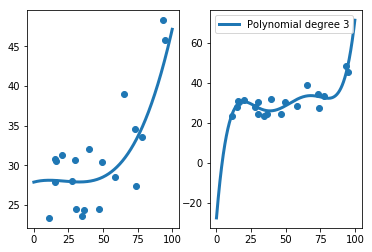

In [34]:
# we take a small subsample of x, 
# results are more dramatic

# x_test = np.arange(0,100)
# y_test = 2+ (1.01 ** x_test) - (1.02 * x_test**2) + ( 1.01 * x_test**3) - ( 1.02 * x_test**4)
# plt.scatter(x_test, y_test)

from patsy import dmatrix
import statsmodels.api as sm
# # Specifying 3 knots
x_axis = np.arange(0, 100, 0.05).reshape(-1,1)
transformed_x = dmatrix("bs(x, degree=3, df=3, include_intercept=False)", {"x": x[subset_indices]}, return_type='dataframe')
model_4 = sm.GLM(y[subset_indices], transformed_x).fit()

pred4 = model_4.predict(dmatrix("bs(x_axis, degree=3, df=3,include_intercept=False)", {"x_axis": x_axis}, return_type='dataframe'))
model_4.params


plt.subplot(1,2,1)
plt.scatter(x[subset_indices], y[subset_indices])
plt.plot(x_axis, pred4, linewidth=3)


plt.subplot(1,2,2)

plt.scatter(x[subset_indices], y[subset_indices])
poly = PolynomialFeatures(degree=5)
X_vals_transformed = poly.fit_transform(x[subset_indices].reshape(-1,1))    
X_axis_transformed = poly.transform(x_axis)

lin = linear_model.LinearRegression()
lin.fit(X_vals_transformed, y[subset_indices].reshape(-1,1))
y_hat =  lin.predict(X_axis_transformed)

plt.plot(x_axis, y_hat, label= "Polynomial degree %s" % 3, linewidth=3)
plt.legend() 